### Cuml installation 

In [ ]:
!nvidia-smi

Tue Jul 20 14:17:32 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 277, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 277 (delta 59), reused 40 (delta 20), pack-reused 171
Receiving objects: 100% (277/277), 80.66 KiB | 5.04 MiB/s, done.
Resolving deltas: 100% (121/121), done.
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
***********************************************************************



In [ ]:
# This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,418 kB]
Hit:13 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic In

In [ ]:
# This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:37
🔁 Restarting kernel...


In [ ]:
# you can now run the rest of the cells as normal
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
# The <packages> option are default blank or 'core'.  By default, we install RAPIDSAI and BlazingSQL.  The 'core' option will install only RAPIDSAI and not include BlazingSQL, 
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Installing RAPIDS Stable 21.06
Starting the RAPIDS+BlazingSQL install on Colab.  This will take about 15 minutes.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=11.0
    - gcsfs
    - llvmlite
    - openssl
    - python=3.7
    - rapids-blazing=21.06


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    abseil-cpp-20210324.1      |       h9c3ff4c_0        1015 KB  conda-forge
    aiohttp-3.7.4.post0        |   py37h5e8e339_0         625 KB  conda-forge
    anyio-3.2.1                |   py37h89c1867_0         138 KB  conda-forge
    appdirs-1.4.4              |     pyh9f0ad1d_0      

In [ ]:
import cudf
import io, requests

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.chdir('/content/gdrive/My Drive/santander_transcation_prediction')

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("train.csv.zip")

In [ ]:
df_1=cudf.DataFrame()
df_1=df.copy()

In [ ]:
#train
#df=cudf.read_csv("train.csv.zip")
X=df_1.drop(['ID_code','target'],axis=1)
Y=df_1['target']
del df,df_1;


In [ ]:
X=X.astype(np.float32)
Y=Y.astype(np.int32)

In [ ]:
import gc
gc.collect()

2607

In [ ]:
#from cuml.preprocessing.model_selection import train_test_split
from cuml.ensemble import RandomForestClassifier as cuRF

In [ ]:
# search_param={'n_estimators' : [i for i in range(100,2200,200)],
#        'max_depth' : [i for i in range(10,120,10)],
#        'min_samples_split' :[2, 5, 10,15,20],
#         'max_features' : ['auto', 'sqrt']
       
#        }

In [ ]:
# search_param['max_depth'].append(None)

In [ ]:
# from cuml.metrics import confusion_matrix
# from cuml.metrics import roc_auc_score
# #from cuml.metrics import recall_score



In [ ]:
# clf=cuRF()
# model=RandomizedSearchCV(
#     estimator=clf, param_distributions=search_param, 
#     n_iter=100,
#     scoring='roc_auc',
#     cv=5,
#     #refit='roc_auc',
#     # n_jobs=-1,
#     random_state=314,
#     verbose=1000)

In [ ]:
# model.fit(X,Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)

### max_depth=15,n_estimator=100,min_sample_split=100,min_samples_leaf=20,max_features=0.8,max_samples=0.5

In [ ]:
clf=cuRF(max_depth=15,n_estimators=100,min_samples_split=100,min_samples_leaf=20,max_features=0.8,max_samples=0.5)
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_train_predict=clf.predict(X_train)
y_train_predict=y_train_predict.astype(np.int32)
y_train_predict_proba=clf.predict_proba(X_train)

print("auc_train :",roc_auc_score(Y_train,y_train_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_train,y_train_predict))
print("Precision ",precision_score(Y_train,y_train_predict))
print("Recall ",recall_score(Y_train,y_train_predict))

auc_train : 0.8675143718719482
confusion matrix :
 [[143922      0]
 [ 15973    105]]
Precision  1.0
Recall  0.006530663017788282


In [ ]:
y_test_predict=clf.predict(X_test)
y_test_predict=y_test_predict.astype(np.int32)
y_test_predict_proba=clf.predict_proba(X_test)

print("auc_test :",roc_auc_score(Y_test,y_test_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_test,y_test_predict))
print("Precision ",precision_score(Y_test,y_test_predict))
print("Recall ",recall_score(Y_test,y_test_predict))

auc_test : 0.7722368240356445
confusion matrix :
 [[35980     0]
 [ 4017     3]]
Precision  1.0
Recall  0.0007462686567164179


### max_depth=15,n_estimator=100,min_sample_split=100,min_samples_leaf=20,max_features=0.8,max_samples=0.4

In [ ]:
clf=cuRF(max_depth=15,n_estimators=100,min_samples_split=100,min_samples_leaf=20,max_features=0.8,max_samples=0.4)
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_train_predict=clf.predict(X_train)
y_train_predict=y_train_predict.astype(np.int32)
y_train_predict_proba=clf.predict_proba(X_train)

print("auc_train :",roc_auc_score(Y_train,y_train_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_train,y_train_predict))
print("Precision ",precision_score(Y_train,y_train_predict))
print("Recall ",recall_score(Y_train,y_train_predict))

auc_train : 0.8535325527191162
confusion matrix :
 [[143922      0]
 [ 16042     36]]
Precision  1.0
Recall  0.002239084463241697


In [ ]:
y_test_predict=clf.predict(X_test)
y_test_predict=y_test_predict.astype(np.int32)
y_test_predict_proba=clf.predict_proba(X_test)

print("auc_test :",roc_auc_score(Y_test,y_test_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_test,y_test_predict))
print("Precision ",precision_score(Y_test,y_test_predict))
print("Recall ",recall_score(Y_test,y_test_predict))

auc_test : 0.7678448557853699
confusion matrix :
 [[35980     0]
 [ 4019     1]]
Precision  1.0
Recall  0.0002487562189054726


### max_depth=15,n_estimator=100,min_sample_split=100,min_samples_leaf=20,max_features=0.8,max_samples=0.3

In [ ]:
clf=cuRF(max_depth=15,n_estimators=100,min_samples_split=100,min_samples_leaf=20,max_features=0.8,max_samples=0.3)
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_train_predict=clf.predict(X_train)
y_train_predict=y_train_predict.astype(np.int32)
y_train_predict_proba=clf.predict_proba(X_train)

print("auc_train :",roc_auc_score(Y_train,y_train_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_train,y_train_predict))
print("Precision ",precision_score(Y_train,y_train_predict))
print("Recall ",recall_score(Y_train,y_train_predict))

auc_train : 0.835281491279602
confusion matrix :
 [[143922      0]
 [ 16068     10]]
Precision  1.0
Recall  0.0006219679064560268


In [ ]:
y_test_predict=clf.predict(X_test)
y_test_predict=y_test_predict.astype(np.int32)
y_test_predict_proba=clf.predict_proba(X_test)

print("auc_test :",roc_auc_score(Y_test,y_test_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_test,y_test_predict))
print("Precision ",precision_score(Y_test,y_test_predict))
print("Recall ",recall_score(Y_test,y_test_predict))

auc_test : 0.7617092728614807
confusion matrix :
 [[35980     0]
 [ 4019     1]]
Precision  1.0
Recall  0.0002487562189054726


### max_depth=15,n_estimator=200,min_sample_split=100,min_samples_leaf=20,max_features=0.8,max_samples=0.4

In [ ]:
clf=cuRF(max_depth=15,n_estimators=200,min_samples_split=100,min_samples_leaf=20,max_features=0.8,max_samples=0.4)
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_train_predict=clf.predict(X_train)
y_train_predict=y_train_predict.astype(np.int32)
y_train_predict_proba=clf.predict_proba(X_train)

print("auc_train :",roc_auc_score(Y_train,y_train_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_train,y_train_predict))
print("Precision ",precision_score(Y_train,y_train_predict))
print("Recall ",recall_score(Y_train,y_train_predict))

auc_train : 0.8665624856948853
confusion matrix :
 [[143922      0]
 [ 16045     33]]
Precision  1.0
Recall  0.0020524940913048888


In [ ]:
y_test_predict=clf.predict(X_test)
y_test_predict=y_test_predict.astype(np.int32)
y_test_predict_proba=clf.predict_proba(X_test)

print("auc_test :",roc_auc_score(Y_test,y_test_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_test,y_test_predict))
print("Precision ",precision_score(Y_test,y_test_predict))
print("Recall ",recall_score(Y_test,y_test_predict))

auc_test : 0.780985951423645
confusion matrix :
 [[35980     0]
 [ 4020     0]]
Precision  0.0
Recall  0.0


### max_depth=15,n_estimator=200,min_sample_split=100,min_samples_leaf=20,max_features=0.6,max_samples=0.4

In [ ]:
clf=cuRF(max_depth=15,n_estimators=200,min_samples_split=100,min_samples_leaf=20,max_features=0.6,max_samples=0.4)
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_train_predict=clf.predict(X_train)
y_train_predict=y_train_predict.astype(np.int32)
y_train_predict_proba=clf.predict_proba(X_train)

print("auc_train :",roc_auc_score(Y_train,y_train_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_train,y_train_predict))
print("Precision ",precision_score(Y_train,y_train_predict))
print("Recall ",recall_score(Y_train,y_train_predict))

auc_train : 0.8639296293258667
confusion matrix :
 [[143922      0]
 [ 16056     22]]
Precision  1.0
Recall  0.0013683293942032592


In [ ]:
y_test_predict=clf.predict(X_test)
y_test_predict=y_test_predict.astype(np.int32)
y_test_predict_proba=clf.predict_proba(X_test)

print("auc_test :",roc_auc_score(Y_test,y_test_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_test,y_test_predict))
print("Precision ",precision_score(Y_test,y_test_predict))
print("Recall ",recall_score(Y_test,y_test_predict))

auc_test : 0.7783875465393066
confusion matrix :
 [[35980     0]
 [ 4018     2]]
Precision  1.0
Recall  0.0004975124378109452


### max_depth=12,n_estimator=200,min_sample_split=100,min_samples_leaf=20,max_features=0.8,max_samples=0.4

In [ ]:
clf=cuRF(max_depth=12,n_estimators=200,min_samples_split=100,min_samples_leaf=20,max_features=0.8,max_samples=0.4)
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_train_predict=clf.predict(X_train)
y_train_predict=y_train_predict.astype(np.int32)
y_train_predict_proba=clf.predict_proba(X_train)

print("auc_train :",roc_auc_score(Y_train,y_train_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_train,y_train_predict))
print("Precision ",precision_score(Y_train,y_train_predict))
print("Recall ",recall_score(Y_train,y_train_predict))

auc_train : 0.8503515720367432
confusion matrix :
 [[143922      0]
 [ 16046     32]]
Precision  1.0
Recall  0.001990297300659286


In [ ]:
y_test_predict=clf.predict(X_test)
y_test_predict=y_test_predict.astype(np.int32)
y_test_predict_proba=clf.predict_proba(X_test)

print("auc_test :",roc_auc_score(Y_test,y_test_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_test,y_test_predict))
print("Precision ",precision_score(Y_test,y_test_predict))
print("Recall ",recall_score(Y_test,y_test_predict))

auc_test : 0.774019718170166
confusion matrix :
 [[35980     0]
 [ 4020     0]]
Precision  0.0
Recall  0.0


### max_depth=10,n_estimator=200,min_sample_split=100,min_samples_leaf=20,max_features=0.8,max_samples=0.4

In [ ]:
clf=cuRF(max_depth=15,n_estimators=200,min_samples_split=100,min_samples_leaf=20,max_features=0.8,max_samples=0.4)
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_train_predict=clf.predict(X_train)
y_train_predict=y_train_predict.astype(np.int32)
y_train_predict_proba=clf.predict_proba(X_train)

print("auc_train :",roc_auc_score(Y_train,y_train_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_train,y_train_predict))
print("Precision ",precision_score(Y_train,y_train_predict))
print("Recall ",recall_score(Y_train,y_train_predict))

auc_train : 0.8665624856948853
confusion matrix :
 [[143922      0]
 [ 16045     33]]
Precision  1.0
Recall  0.0020524940913048888


In [ ]:
y_test_predict=clf.predict(X_test)
y_test_predict=y_test_predict.astype(np.int32)
y_test_predict_proba=clf.predict_proba(X_test)

print("auc_test :",roc_auc_score(Y_test,y_test_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_test,y_test_predict))
print("Precision ",precision_score(Y_test,y_test_predict))
print("Recall ",recall_score(Y_test,y_test_predict))

auc_test : 0.780985951423645
confusion matrix :
 [[35980     0]
 [ 4020     0]]
Precision  0.0
Recall  0.0


### max_depth=10,n_estimator=200,min_sample_split=50,min_samples_leaf=20,max_features=0.8,max_samples=0.4

In [ ]:
clf=cuRF(max_depth=15,n_estimators=200,min_samples_split=50,min_samples_leaf=20,max_features=0.8,max_samples=0.4)
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_train_predict=clf.predict(X_train)
y_train_predict=y_train_predict.astype(np.int32)
y_train_predict_proba=clf.predict_proba(X_train)

print("auc_train :",roc_auc_score(Y_train,y_train_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_train,y_train_predict))
print("Precision ",precision_score(Y_train,y_train_predict))
print("Recall ",recall_score(Y_train,y_train_predict))

auc_train : 0.8965475559234619
confusion matrix :
 [[143922      0]
 [ 16023     55]]
Precision  1.0
Recall  0.003420823485508148


In [ ]:
y_test_predict=clf.predict(X_test)
y_test_predict=y_test_predict.astype(np.int32)
y_test_predict_proba=clf.predict_proba(X_test)

print("auc_test :",roc_auc_score(Y_test,y_test_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_test,y_test_predict))
print("Precision ",precision_score(Y_test,y_test_predict))
print("Recall ",recall_score(Y_test,y_test_predict))

auc_test : 0.7921292781829834
confusion matrix :
 [[35980     0]
 [ 4020     0]]
Precision  0.0
Recall  0.0


### max_depth=15,n_estimator=200,min_sample_split=10,min_samples_leaf=2,max_features=0.8,max_samples=0.4

In [ ]:
clf=cuRF(max_depth=15,n_estimators=200,min_samples_split=10,min_samples_leaf=2,max_features=0.8,max_samples=0.4)
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_train_predict=clf.predict(X_train)
y_train_predict=y_train_predict.astype(np.int32)
y_train_predict_proba=clf.predict_proba(X_train)

print("auc_train :",roc_auc_score(Y_train,y_train_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_train,y_train_predict))
print("Precision ",precision_score(Y_train,y_train_predict))
print("Recall ",recall_score(Y_train,y_train_predict))

auc_train : 0.9424203634262085
confusion matrix :
 [[143922      0]
 [ 15620    458]]
Precision  1.0
Recall  0.028486130115686032


In [ ]:
y_test_predict=clf.predict(X_test)
y_test_predict=y_test_predict.astype(np.int32)
y_test_predict_proba=clf.predict_proba(X_test)

print("auc_test :",roc_auc_score(Y_test,y_test_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_test,y_test_predict))
print("Precision ",precision_score(Y_test,y_test_predict))
print("Recall ",recall_score(Y_test,y_test_predict))

auc_test : 0.7973809242248535
confusion matrix :
 [[35980     0]
 [ 4019     1]]
Precision  1.0
Recall  0.0002487562189054726


### max_depth=15,n_estimator=200,min_sample_split=10,min_samples_leaf=5,max_features=0.8,max_samples=0.4

In [ ]:
clf=cuRF(max_depth=15,n_estimators=200,min_samples_split=10,min_samples_leaf=5,max_features=0.8,max_samples=0.4)
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_train_predict=clf.predict(X_train)
y_train_predict=y_train_predict.astype(np.int32)
y_train_predict_proba=clf.predict_proba(X_train)

print("auc_train :",roc_auc_score(Y_train,y_train_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_train,y_train_predict))
print("Precision ",precision_score(Y_train,y_train_predict))
print("Recall ",recall_score(Y_train,y_train_predict))

auc_train : 0.9372739195823669
confusion matrix :
 [[143922      0]
 [ 15645    433]]
Precision  1.0
Recall  0.026931210349545962


In [ ]:
y_test_predict=clf.predict(X_test)
y_test_predict=y_test_predict.astype(np.int32)
y_test_predict_proba=clf.predict_proba(X_test)

print("auc_test :",roc_auc_score(Y_test,y_test_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_test,y_test_predict))
print("Precision ",precision_score(Y_test,y_test_predict))
print("Recall ",recall_score(Y_test,y_test_predict))

auc_test : 0.7976995706558228
confusion matrix :
 [[35980     0]
 [ 4019     1]]
Precision  1.0
Recall  0.0002487562189054726


### max_depth=12,n_estimator=1000,min_sample_split=10,min_samples_leaf=5,max_features=0.8,max_samples=0.4

In [ ]:
clf=cuRF(max_depth=15,n_estimators=200,min_samples_split=10,min_samples_leaf=5,max_features=0.8,max_samples=0.4)
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_train_predict=clf.predict(X_train)
y_train_predict=y_train_predict.astype(np.int32)
y_train_predict_proba=clf.predict_proba(X_train)

print("auc_train :",roc_auc_score(Y_train,y_train_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_train,y_train_predict))
print("Precision ",precision_score(Y_train,y_train_predict))
print("Recall ",recall_score(Y_train,y_train_predict))

auc_train : 0.9372739195823669
confusion matrix :
 [[143922      0]
 [ 15645    433]]
Precision  1.0
Recall  0.026931210349545962


In [ ]:
y_test_predict=clf.predict(X_test)
y_test_predict=y_test_predict.astype(np.int32)
y_test_predict_proba=clf.predict_proba(X_test)

print("auc_test :",roc_auc_score(Y_test,y_test_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_test,y_test_predict))
print("Precision ",precision_score(Y_test,y_test_predict))
print("Recall ",recall_score(Y_test,y_test_predict))

auc_test : 0.7976995706558228
confusion matrix :
 [[35980     0]
 [ 4019     1]]
Precision  1.0
Recall  0.0002487562189054726


### max_depth=16,n_estimator=100,min_sample_split=2,min_samples_leaf=1,max_features='auto',max_samples=1.0

In [ ]:
clf=cuRF()
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_train_predict=clf.predict(X_train)
y_train_predict=y_train_predict.astype(np.int32)
y_train_predict_proba=clf.predict_proba(X_train)

print("auc_train :",roc_auc_score(Y_train,y_train_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_train,y_train_predict))
print("Precision ",precision_score(Y_train,y_train_predict))
print("Recall ",recall_score(Y_train,y_train_predict))

auc_train : 0.9914312362670898
confusion matrix :
 [[143922      0]
 [ 15056   1022]]
Precision  1.0
Recall  0.06356512003980595


In [ ]:
y_test_predict=clf.predict(X_test)
y_test_predict=y_test_predict.astype(np.int32)
y_test_predict_proba=clf.predict_proba(X_test)

print("auc_test :",roc_auc_score(Y_test,y_test_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_test,y_test_predict))
print("Precision ",precision_score(Y_test,y_test_predict))
print("Recall ",recall_score(Y_test,y_test_predict))

auc_test : 0.8127094507217407
confusion matrix :
 [[35980     0]
 [ 4020     0]]
Precision  0.0
Recall  0.0


# kaggle scores are also shown for below parameters

### max_depth=20,n_estimator=1000,min_sample_split=10,min_samples_leaf=5,max_features=0.5,max_samples=0.3

In [ ]:
# #from cuml.preprocessing.model_selection import train_test_split
from cuml.ensemble import RandomForestClassifier as cuRF

In [ ]:
clf=cuRF(max_depth=20,n_estimators=1000,min_samples_split=10,min_samples_leaf=5,max_features=0.5,max_samples=0.3)
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_train_predict=clf.predict(X_train)
y_train_predict=y_train_predict.astype(np.int32)
y_train_predict_proba=clf.predict_proba(X_train)

print("auc_train :",roc_auc_score(Y_train,y_train_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_train,y_train_predict))
print("Precision ",precision_score(Y_train,y_train_predict))
print("Recall ",recall_score(Y_train,y_train_predict))

auc_train : 0.9734459179255192
confusion matrix :
 [[143922      0]
 [ 15833    245]]
Precision  1.0
Recall  0.015238213708172658


In [ ]:
y_test_predict=clf.predict(X_test)
y_test_predict=y_test_predict.astype(np.int32)
y_test_predict_proba=clf.predict_proba(X_test)

print("auc_test :",roc_auc_score(Y_test,y_test_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_test,y_test_predict))
print("Precision ",precision_score(Y_test,y_test_predict))
print("Recall ",recall_score(Y_test,y_test_predict))

auc_test : 0.8273627312298983
confusion matrix :
 [[35980     0]
 [ 4020     0]]
Precision  0.0
Recall  0.0


submission

In [ ]:
#test
df_subm=pd.read_csv("test.csv.zip")
df_2=cudf.DataFrame()
df_2=df_subm.copy()
X_subm=df_2.drop('ID_code',axis=1).astype(np.float32)
del df_subm,df_2


In [ ]:
test_score_subm=clf.predict_proba(X_subm)[:,1]

ID_code=[f'test_{i}' for i in range(200000)]
d={'ID_code':ID_code,'target':test_score_subm}
submission=pd.DataFrame(data=d)

submission.to_csv("STP_custom_ensemble/cuml_RF_max_depth_20_n_estimator_1000_min_sample_split_10_min_samples_leaf_5_max_features_0.5_max_samples_0.3.csv",index=False)

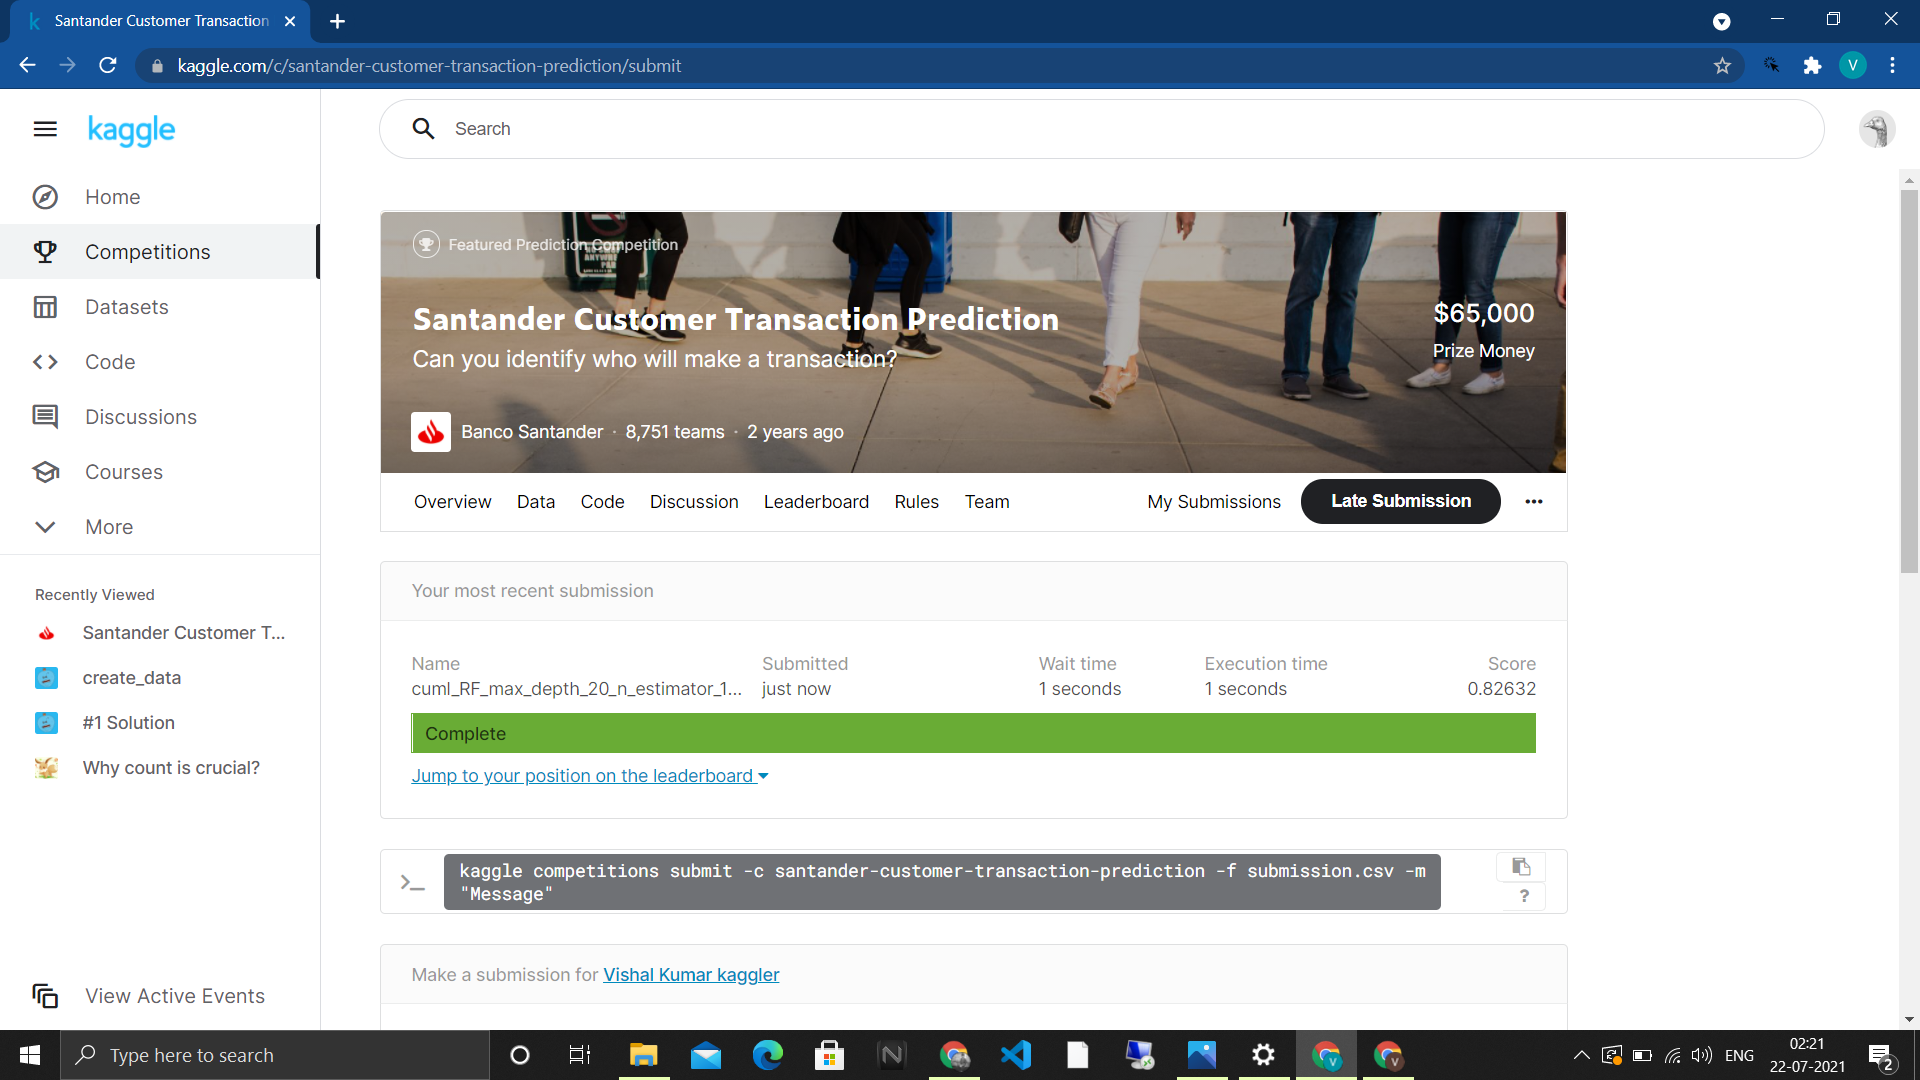

### max_depth=20,n_estimator=700,min_sample_split=10,min_samples_leaf=5,max_features=0.5,max_samples=0.1

In [ ]:
# #from cuml.preprocessing.model_selection import train_test_split
from cuml.ensemble import RandomForestClassifier as cuRF

In [ ]:
clf=cuRF(max_depth=20,n_estimators=700,min_samples_split=10,min_samples_leaf=5,max_features=0.5,max_samples=0.1)
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_train_predict=clf.predict(X_train)
y_train_predict=y_train_predict.astype(np.int32)
y_train_predict_proba=clf.predict_proba(X_train)

print("auc_train :",roc_auc_score(Y_train,y_train_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_train,y_train_predict))
print("Precision ",precision_score(Y_train,y_train_predict))
print("Recall ",recall_score(Y_train,y_train_predict))

auc_train : 0.9403124701212576
confusion matrix :
 [[143922      0]
 [ 16077      1]]
Precision  1.0
Recall  6.219679064560268e-05


In [ ]:
y_test_predict=clf.predict(X_test)
y_test_predict=y_test_predict.astype(np.int32)
y_test_predict_proba=clf.predict_proba(X_test)

print("auc_test :",roc_auc_score(Y_test,y_test_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_test,y_test_predict))
print("Precision ",precision_score(Y_test,y_test_predict))
print("Recall ",recall_score(Y_test,y_test_predict))

auc_test : 0.8390435917964375
confusion matrix :
 [[35980     0]
 [ 4020     0]]
Precision  0.0
Recall  0.0


submission

In [ ]:
#test
df_subm=pd.read_csv("test.csv.zip")
df_2=cudf.DataFrame()
df_2=df_subm.copy()
X_subm=df_2.drop('ID_code',axis=1).astype(np.float32)
del df_subm,df_2


In [ ]:
test_score_subm=clf.predict_proba(X_subm)[:,1]

ID_code=[f'test_{i}' for i in range(200000)]
d={'ID_code':ID_code,'target':test_score_subm}
submission=pd.DataFrame(data=d)

submission.to_csv("STP_custom_ensemble/cuml_RF_max_depth_20_n_estimator_700_min_sample_split_10_min_samples_leaf_5_max_features_0.5_max_samples_0.1.csv",index=False)

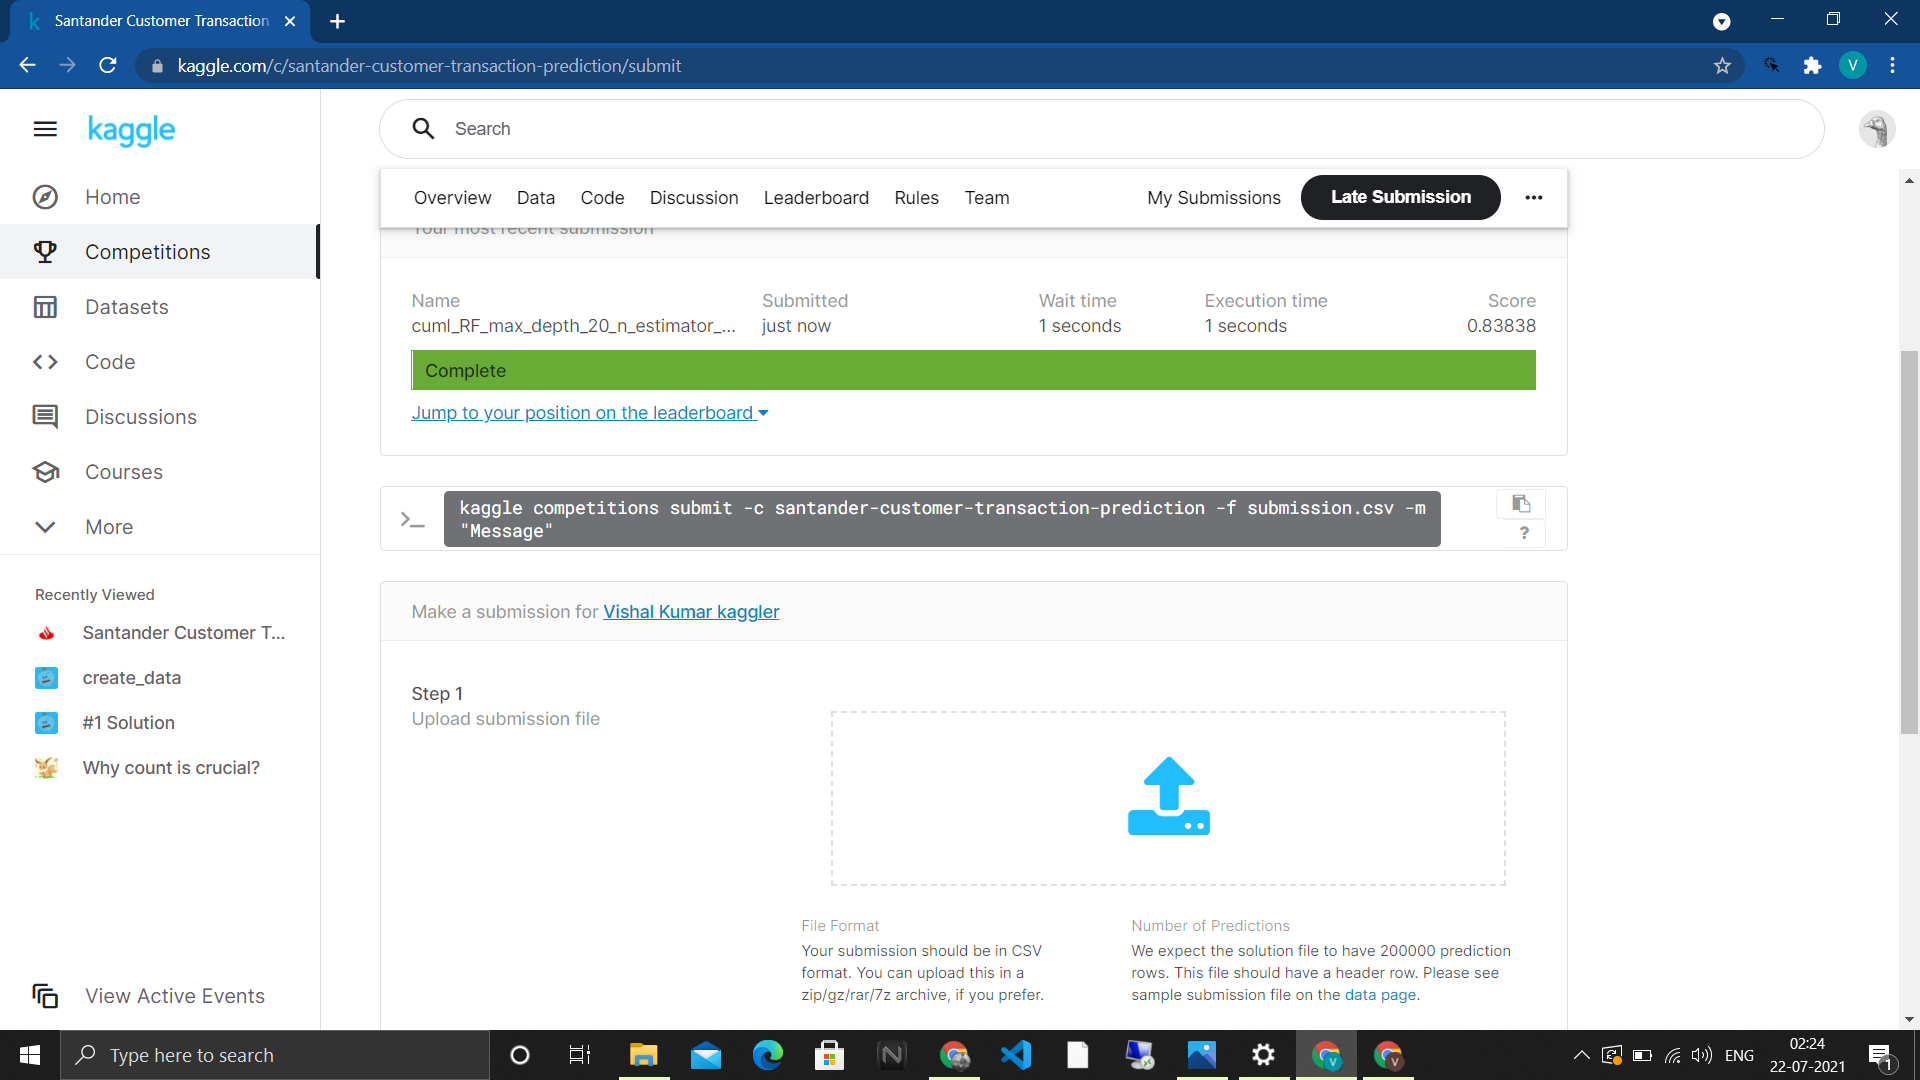

### max_depth=15,n_estimator=700,min_sample_split=10,min_samples_leaf=5,max_features=0.5,max_samples=0.1

In [ ]:
# #from cuml.preprocessing.model_selection import train_test_split
from cuml.ensemble import RandomForestClassifier as cuRF

In [ ]:
clf=cuRF(max_depth=15,n_estimators=700,min_samples_split=10,min_samples_leaf=5,max_features=0.5,max_samples=0.1)
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_train_predict=clf.predict(X_train)
y_train_predict=y_train_predict.astype(np.int32)
y_train_predict_proba=clf.predict_proba(X_train)

print("auc_train :",roc_auc_score(Y_train,y_train_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_train,y_train_predict))
print("Precision ",precision_score(Y_train,y_train_predict))
print("Recall ",recall_score(Y_train,y_train_predict))

auc_train : 0.9149332493024535
confusion matrix :
 [[143922      0]
 [ 16078      0]]
Precision  0.0
Recall  0.0


In [ ]:
y_test_predict=clf.predict(X_test)
y_test_predict=y_test_predict.astype(np.int32)
y_test_predict_proba=clf.predict_proba(X_test)

print("auc_test :",roc_auc_score(Y_test,y_test_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_test,y_test_predict))
print("Precision ",precision_score(Y_test,y_test_predict))
print("Recall ",recall_score(Y_test,y_test_predict))

auc_test : 0.8284545622360682
confusion matrix :
 [[35980     0]
 [ 4020     0]]
Precision  0.0
Recall  0.0


submission

In [ ]:
#test
df_subm=pd.read_csv("test.csv.zip")
df_2=cudf.DataFrame()
df_2=df_subm.copy()
X_subm=df_2.drop('ID_code',axis=1).astype(np.float32)
del df_subm,df_2


In [ ]:
test_score_subm=clf.predict_proba(X_subm)[:,1]

ID_code=[f'test_{i}' for i in range(200000)]
d={'ID_code':ID_code,'target':test_score_subm}
submission=pd.DataFrame(data=d)

submission.to_csv("STP_custom_ensemble/cuml_RF_max_depth_15_n_estimator_700_min_sample_split_10_min_samples_leaf_5_max_features_0.5_max_samples_0.1.csv",index=False)

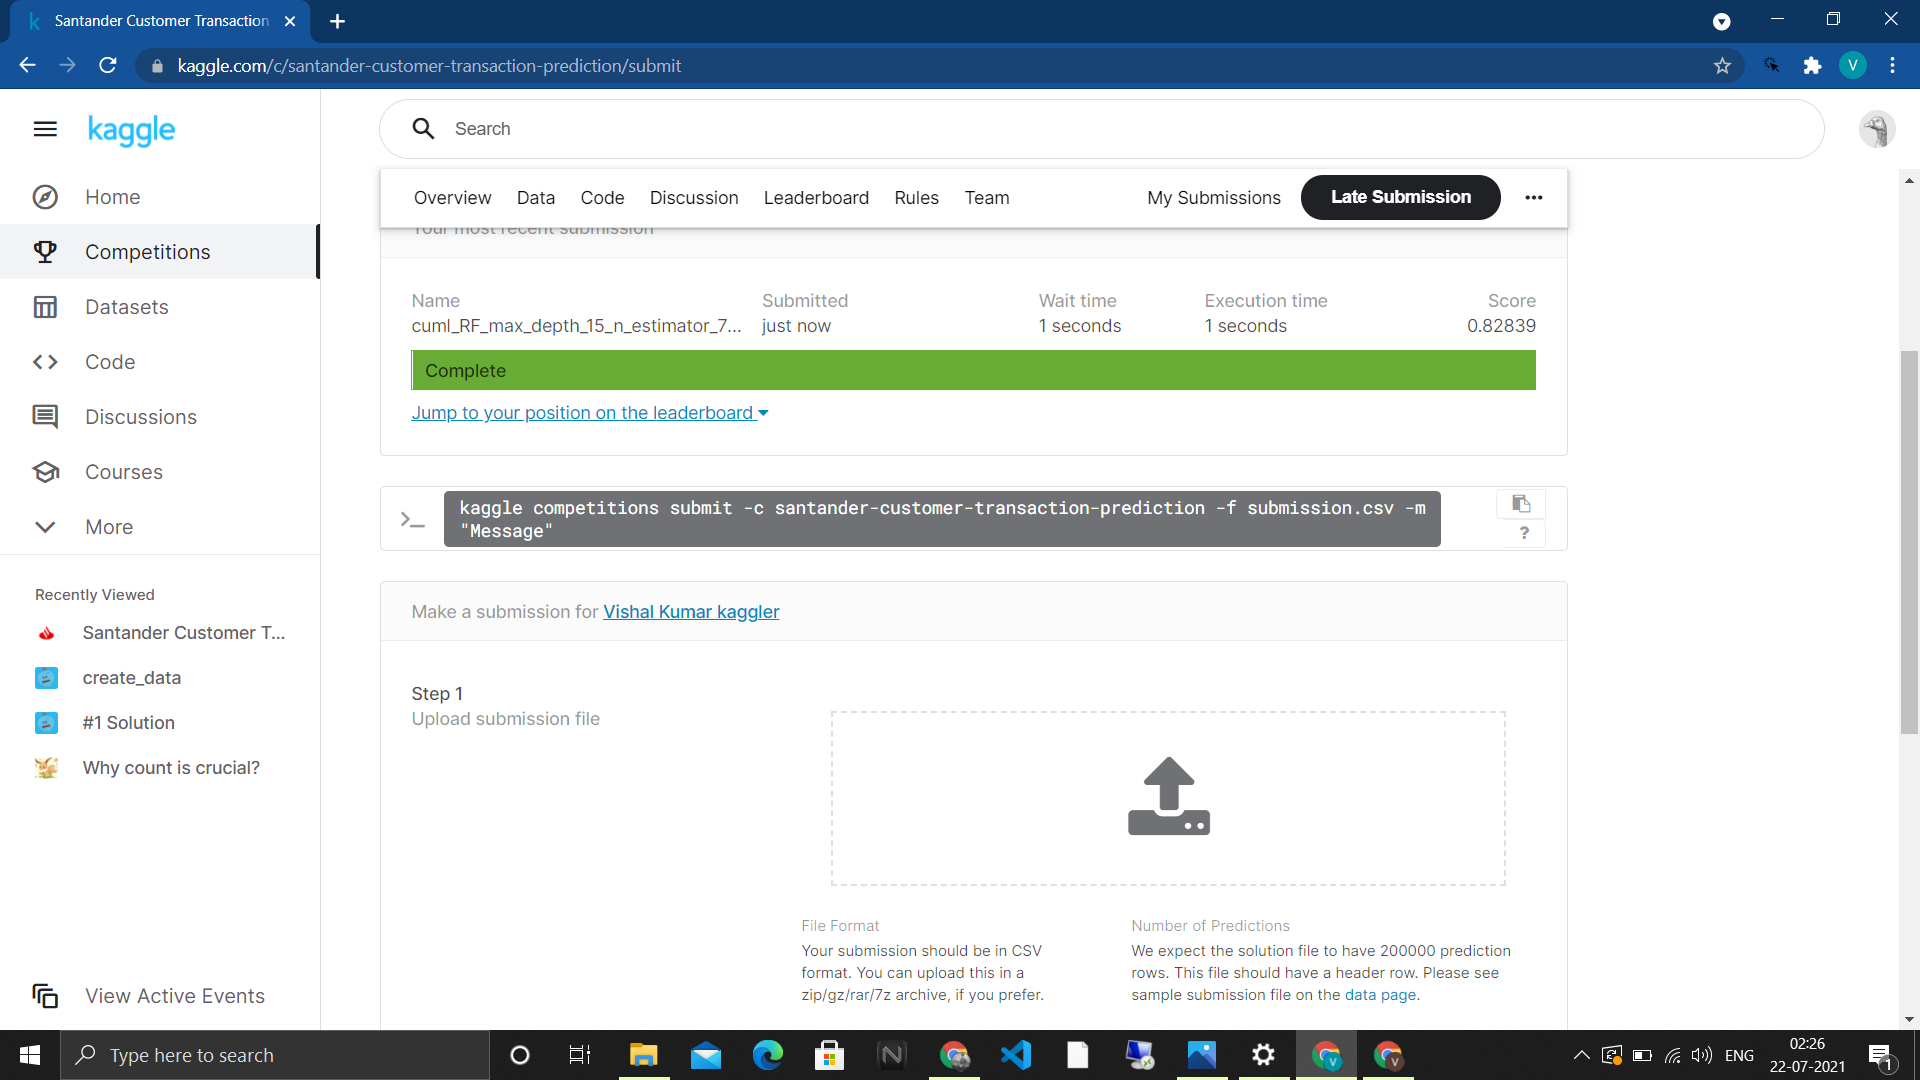

### max_depth=18,n_estimator=700,min_sample_split=10,min_samples_leaf=5,max_features=0.5,max_samples=0.1

In [ ]:
# #from cuml.preprocessing.model_selection import train_test_split
from cuml.ensemble import RandomForestClassifier as cuRF

In [ ]:
clf=cuRF(max_depth=18,n_estimators=700,min_samples_split=10,min_samples_leaf=5,max_features=0.5,max_samples=0.1)
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_train_predict=clf.predict(X_train)
y_train_predict=y_train_predict.astype(np.int32)
y_train_predict_proba=clf.predict_proba(X_train)

print("auc_train :",roc_auc_score(Y_train,y_train_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_train,y_train_predict))
print("Precision ",precision_score(Y_train,y_train_predict))
print("Recall ",recall_score(Y_train,y_train_predict))

auc_train : 0.93192516967824
confusion matrix :
 [[143922      0]
 [ 16077      1]]
Precision  1.0
Recall  6.219679064560268e-05


In [ ]:
y_test_predict=clf.predict(X_test)
y_test_predict=y_test_predict.astype(np.int32)
y_test_predict_proba=clf.predict_proba(X_test)

print("auc_test :",roc_auc_score(Y_test,y_test_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_test,y_test_predict))
print("Precision ",precision_score(Y_test,y_test_predict))
print("Recall ",recall_score(Y_test,y_test_predict))

auc_test : 0.8356162143700618
confusion matrix :
 [[35980     0]
 [ 4020     0]]
Precision  0.0
Recall  0.0


submission

In [ ]:
#test
df_subm=pd.read_csv("test.csv.zip")
df_2=cudf.DataFrame()
df_2=df_subm.copy()
X_subm=df_2.drop('ID_code',axis=1).astype(np.float32)
del df_subm,df_2


In [ ]:
test_score_subm=clf.predict_proba(X_subm)[:,1]

ID_code=[f'test_{i}' for i in range(200000)]
d={'ID_code':ID_code,'target':test_score_subm}
submission=pd.DataFrame(data=d)

submission.to_csv("STP_custom_ensemble/cuml_RF_max_depth_18_n_estimator_700_min_sample_split_10_min_samples_leaf_5_max_features_0.5_max_samples_0.1.csv",index=False)

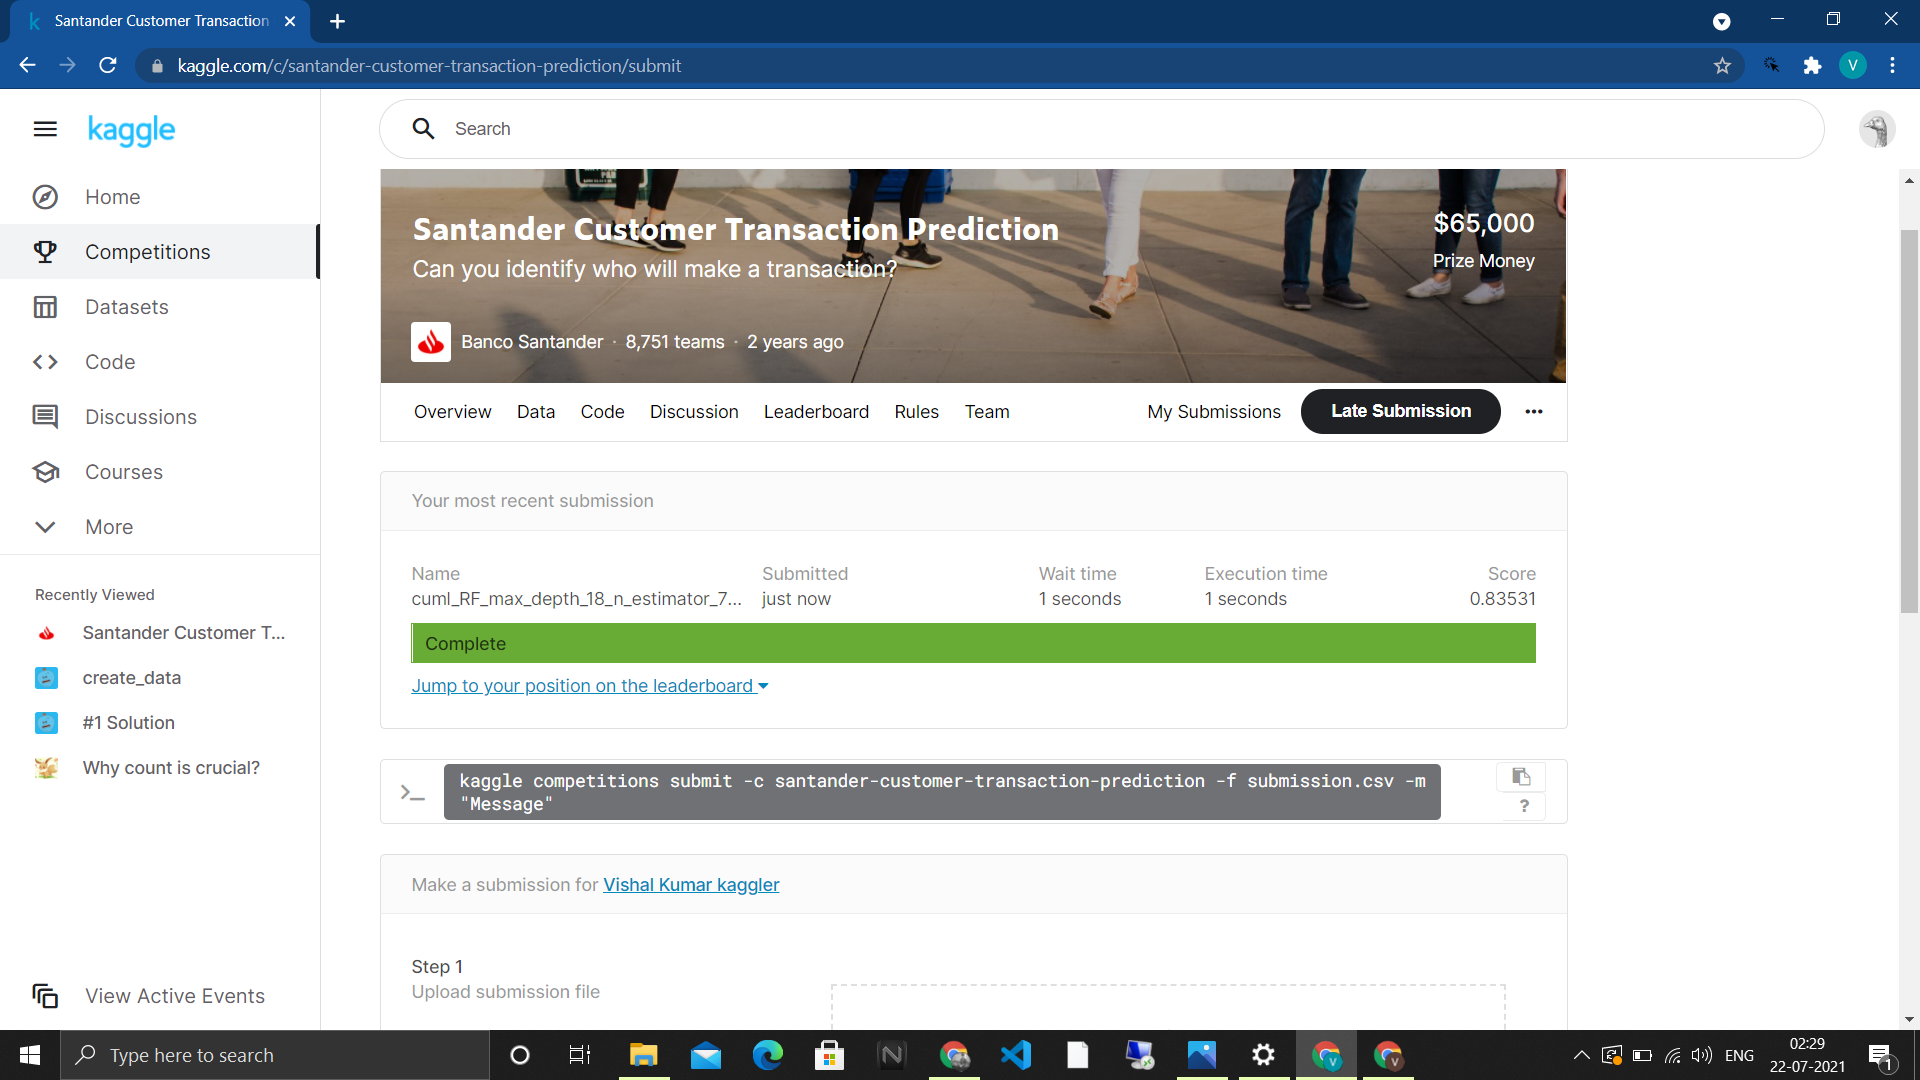

### max_depth=23,n_estimator=700,min_sample_split=10,min_samples_leaf=5,max_features=0.1,max_samples=0.1

In [ ]:
# #from cuml.preprocessing.model_selection import train_test_split
from cuml.ensemble import RandomForestClassifier as cuRF

In [ ]:
clf=cuRF(max_depth=23,n_estimators=700,min_samples_split=10,min_samples_leaf=5,max_features=0.1,max_samples=0.1)
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_train_predict=clf.predict(X_train)
y_train_predict=y_train_predict.astype(np.int32)
y_train_predict_proba=clf.predict_proba(X_train)

print("auc_train :",roc_auc_score(Y_train,y_train_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_train,y_train_predict))
print("Precision ",precision_score(Y_train,y_train_predict))
print("Recall ",recall_score(Y_train,y_train_predict))

auc_train : 0.9602763179525521
confusion matrix :
 [[143922      0]
 [ 16078      0]]
Precision  0.0
Recall  0.0


In [ ]:
y_test_predict=clf.predict(X_test)
y_test_predict=y_test_predict.astype(np.int32)
y_test_predict_proba=clf.predict_proba(X_test)

print("auc_test :",roc_auc_score(Y_test,y_test_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_test,y_test_predict))
print("Precision ",precision_score(Y_test,y_test_predict))
print("Recall ",recall_score(Y_test,y_test_predict))

auc_test : 0.8538802547849967
confusion matrix :
 [[35980     0]
 [ 4020     0]]
Precision  0.0
Recall  0.0


submission

In [ ]:
#test
df_subm=pd.read_csv("test.csv.zip")
df_2=cudf.DataFrame()
df_2=df_subm.copy()
X_subm=df_2.drop('ID_code',axis=1).astype(np.float32)
del df_subm,df_2


In [ ]:
test_score_subm=clf.predict_proba(X_subm)[:,1]

ID_code=[f'test_{i}' for i in range(200000)]
d={'ID_code':ID_code,'target':test_score_subm}
submission=pd.DataFrame(data=d)

submission.to_csv("STP_custom_ensemble/cuml_RF_max_depth_23_n_estimator_700_min_sample_split_10_min_samples_leaf_5_max_features_0.1_max_samples_0.1.csv",index=False)

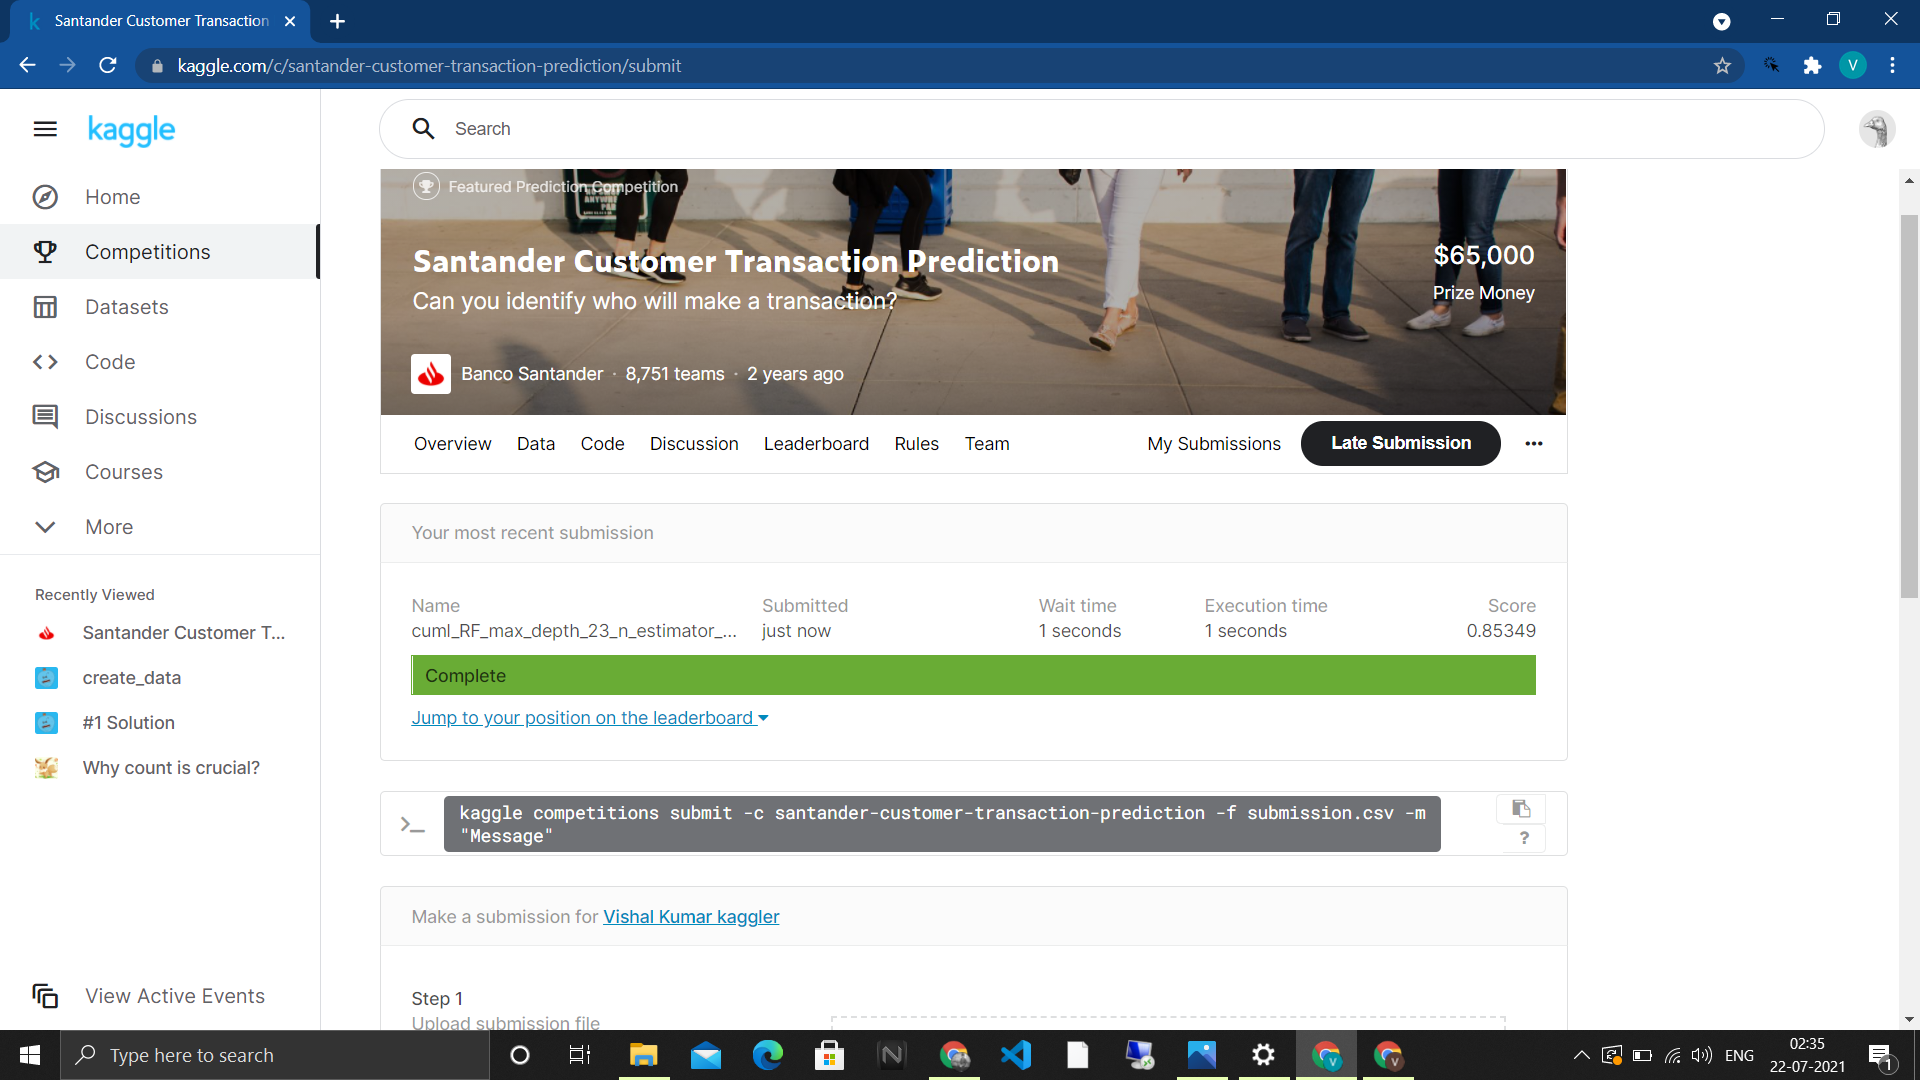

### max_depth=19,n_estimator=2000,min_sample_split=10,min_samples_leaf=5,max_features=0.1,max_samples=0.1

> Indented block



In [ ]:
# #from cuml.preprocessing.model_selection import train_test_split
from cuml.ensemble import RandomForestClassifier as cuRF

In [ ]:
clf=cuRF(max_depth=19,n_estimators=2000,min_samples_split=10,min_samples_leaf=5,max_features=0.1,max_samples=0.1)
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_train_predict=clf.predict(X_train)
y_train_predict=y_train_predict.astype(np.int32)
y_train_predict_proba=clf.predict_proba(X_train)

print("auc_train :",roc_auc_score(Y_train,y_train_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_train,y_train_predict))
print("Precision ",precision_score(Y_train,y_train_predict))
print("Recall ",recall_score(Y_train,y_train_predict))

auc_train : 0.9527867888260347
confusion matrix :
 [[143922      0]
 [ 16078      0]]
Precision  0.0
Recall  0.0


In [ ]:
y_test_predict=clf.predict(X_test)
y_test_predict=y_test_predict.astype(np.int32)
y_test_predict_proba=clf.predict_proba(X_test)

print("auc_test :",roc_auc_score(Y_test,y_test_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_test,y_test_predict))
print("Precision ",precision_score(Y_test,y_test_predict))
print("Recall ",recall_score(Y_test,y_test_predict))

auc_test : 0.8544743348294658
confusion matrix :
 [[35980     0]
 [ 4020     0]]
Precision  0.0
Recall  0.0


submission

In [ ]:
test_score_subm=clf.predict_proba(X_subm)[:,1]

ID_code=[f'test_{i}' for i in range(200000)]
d={'ID_code':ID_code,'target':test_score_subm}
submission=pd.DataFrame(data=d)

submission.to_csv("STP_custom_ensemble/cuml_RF_max_depth_18_n_estimator_1500_min_sample_split_10_min_samples_leaf_5_max_features_0.1_max_samples_0.1.csv",index=False)

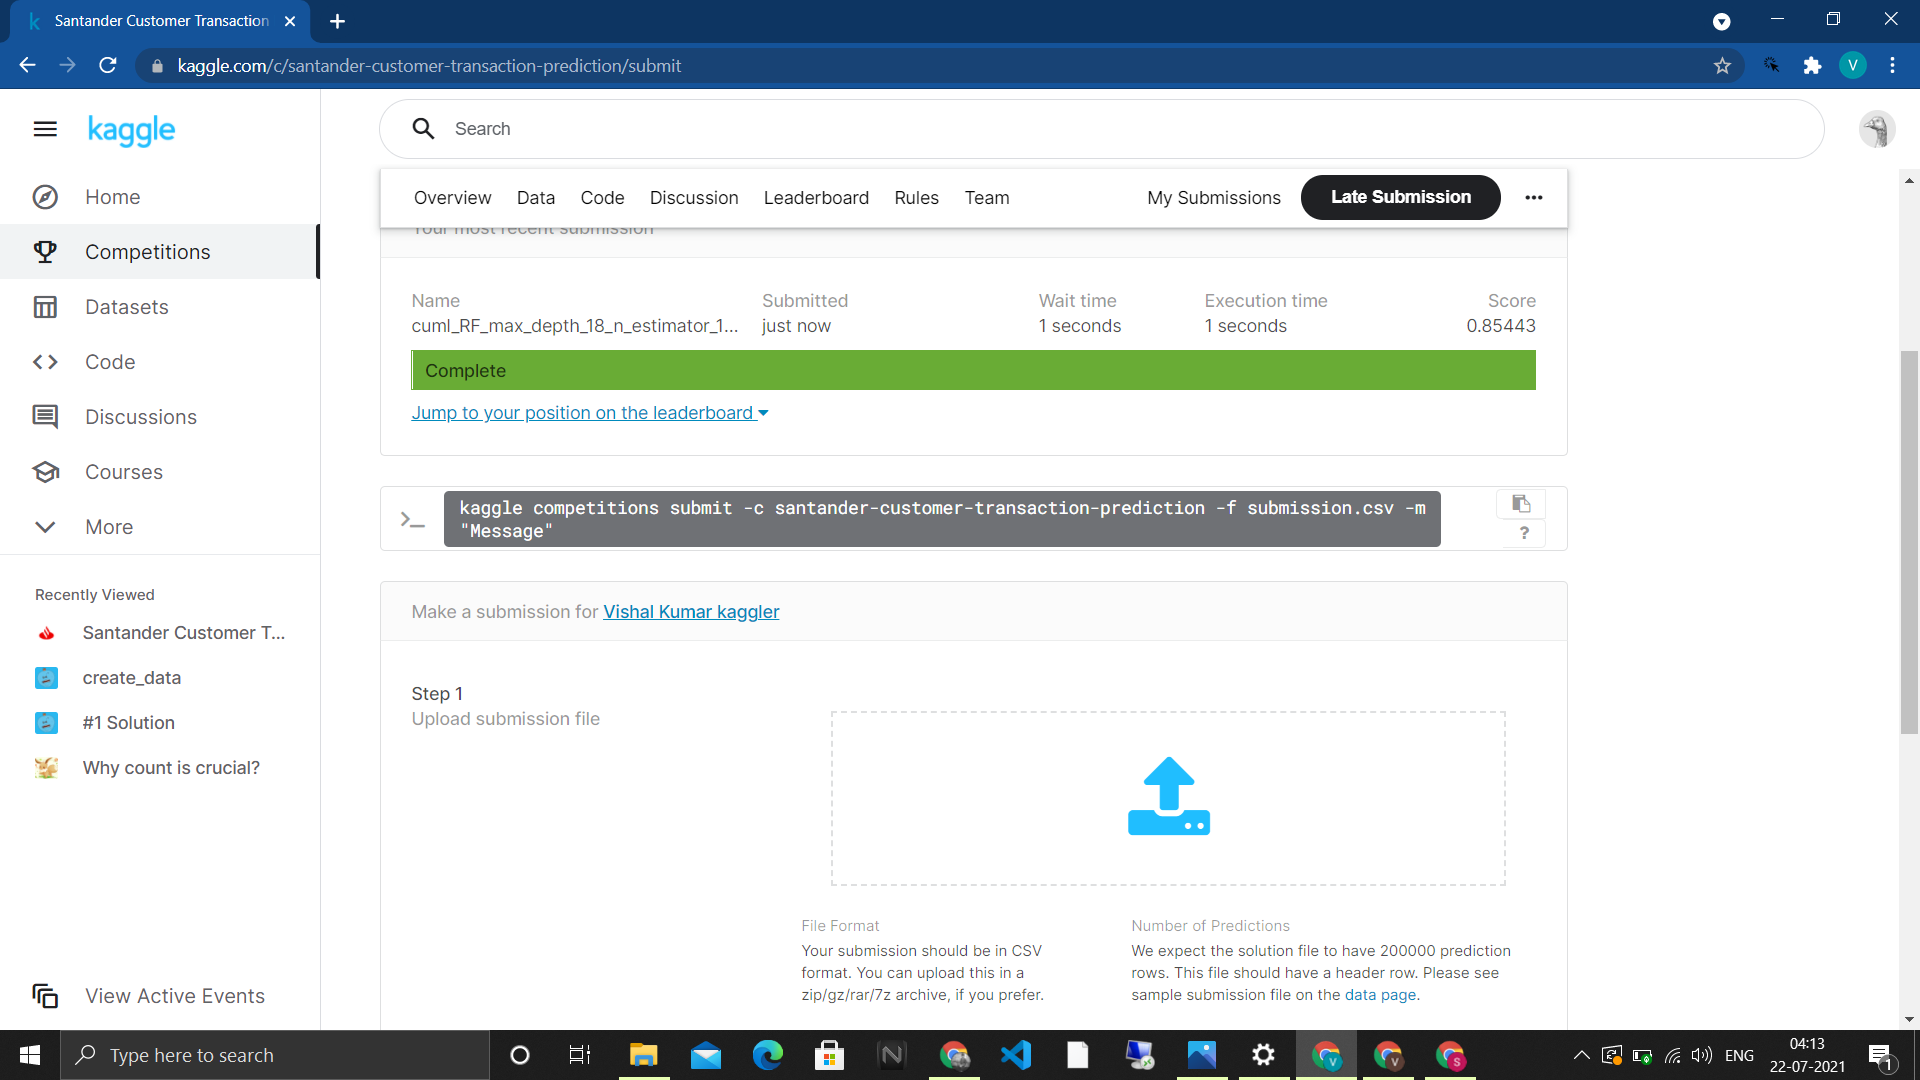

### max_depth=6,n_estimator=2000,min_sample_split=10,min_samples_leaf=5,max_features=0.1,max_samples=0.05

> Indented block



In [ ]:
# #from cuml.preprocessing.model_selection import train_test_split
from cuml.ensemble import RandomForestClassifier as cuRF

In [ ]:
clf=cuRF(max_depth=19,n_estimators=700,min_samples_split=10,min_samples_leaf=5,max_features=0.7,max_samples=0.4)
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_train_predict=clf.predict(X_train)
y_train_predict=y_train_predict.astype(np.int32)
y_train_predict_proba=clf.predict_proba(X_train)

print("auc_train :",roc_auc_score(Y_train,y_train_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_train,y_train_predict))
print("Precision ",precision_score(Y_train,y_train_predict))
print("Recall ",recall_score(Y_train,y_train_predict))

auc_train : 0.9713164848976891
confusion matrix :
 [[143922      0]
 [ 15330    748]]
Precision  1.0
Recall  0.04652319940291081


In [ ]:
y_test_predict=clf.predict(X_test)
y_test_predict=y_test_predict.astype(np.int32)
y_test_predict_proba=clf.predict_proba(X_test)

print("auc_test :",roc_auc_score(Y_test,y_test_predict_proba[:,1]))
print("confusion matrix :\n",confusion_matrix(Y_test,y_test_predict))
print("Precision ",precision_score(Y_test,y_test_predict))
print("Recall ",recall_score(Y_test,y_test_predict))

auc_test : 0.8176858723337178
confusion matrix :
 [[35980     0]
 [ 4019     1]]
Precision  1.0
Recall  0.0002487562189054726


submission

In [ ]:
#test
df_subm=pd.read_csv("test.csv.zip")
df_2=cudf.DataFrame()
df_2=df_subm.copy()
X_subm=df_2.drop('ID_code',axis=1).astype(np.float32)
del df_subm,df_2


In [ ]:
test_score_subm=clf.predict_proba(X_subm)[:,1]

ID_code=[f'test_{i}' for i in range(200000)]
d={'ID_code':ID_code,'target':test_score_subm}
submission=pd.DataFrame(data=d)

submission.to_csv("STP_custom_ensemble/cuml_RF_max_depth_19_n_estimator_700_min_sample_split_10_min_samples_leaf_5_max_features_0.7_max_samples_0.5.csv",index=False)

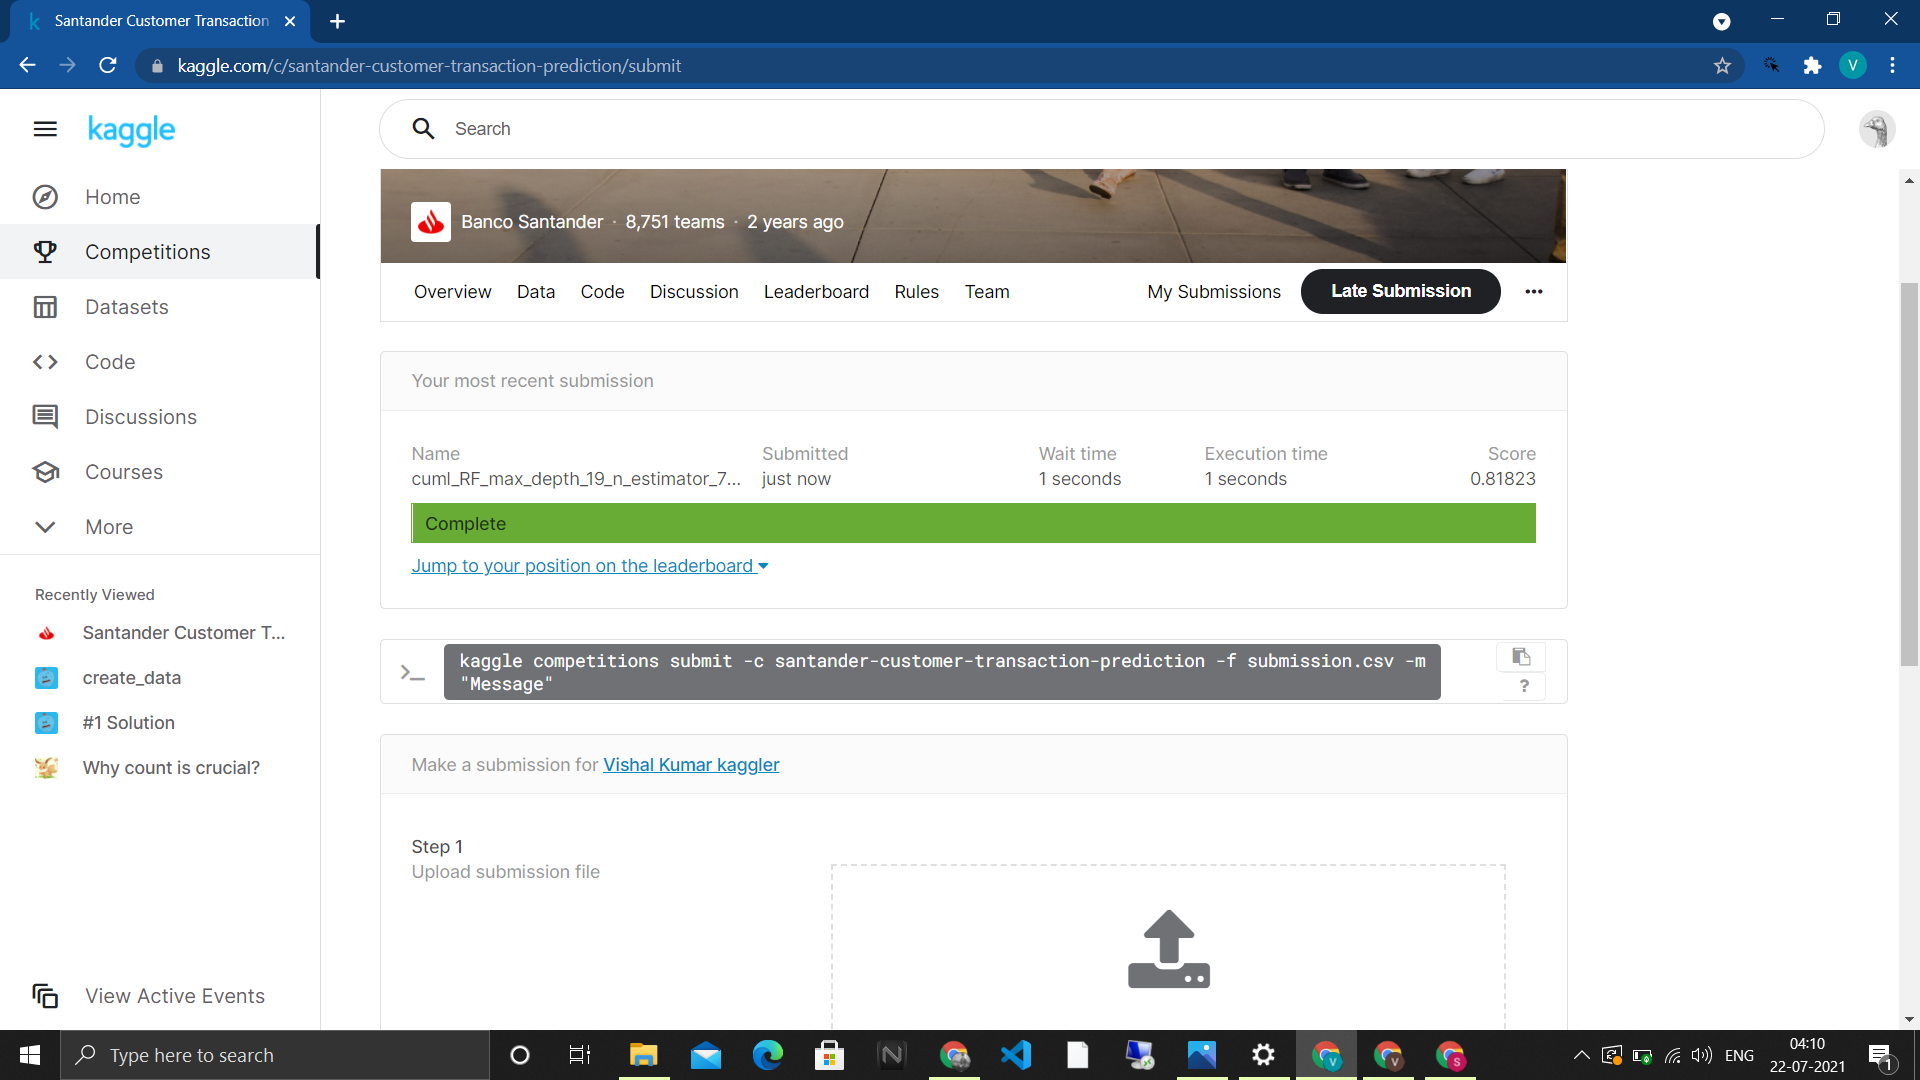

### Conclusion

* we can conclude from above results that Random Forest in not good for imbalance dataset.
* We can see the recall score or prediction of minority class.
* There are very few points are predicted as target_1 and all the majority class are correctly predicted.
* Random forest treats every  every base laerner same i.e one tree one vote But in case of boosting the tree which is more powerful given more importance.
* In boosting all tree are good at predicting majority class samples similar to Random forest but the tree which is good at predicting minor class are given more weightage.
* so boosting is choosen above randomforest.
* In RandomForest(RF) we can assign high class weight to minority class to make things work.
* Assigning class weight may leads to overfitting sometimes & also assigning weights make the RF model to pseudo boosting model.
* some results are shows that boosting works better for imbalance dataset.
